# **TASK 1**
## **Prediction Using Supervised ML**
### **-Kalpataru Dhakate**
**Batch #GRIPJUNE22**

# Objective of the Task : 

## 1. To predict the precentage of student based on no of study hours.
## 2. Also to predict score if student study for 9.5hrs/day.

# Importing all the Libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 2. Loading the Dataset

In [ ]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
url1 = url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(url1)

df


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data Sanity

In [ ]:
'''First step of Data Sanity is to see how many columns and rows dataframe has'''

print(f'The Shape of the DataFrame is : {df.shape}')

print(f'Number of columns are {df.shape[1]}')

print(f'Number of rows are {df.shape[0]}')

The Shape of the DataFrame is : (25, 2)
Number of columns are 2
Number of rows are 25


In [ ]:
'''Second step is to get basic information about the datasets like the type of dtype'''

print('The basic Information of dataframe is as follows: \n')

df.info()

The basic Information of dataframe is as follows: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


We can see that variable name 'Hours' has 25 entries with dtype 'float64', also variable name 'Scores' has 25 enteries with dtype 'int64'

# Step 3. Exploratory Data Analysis

In this step we try to check whether there are any missing values, detect outliers and to see the relationship between Feature and Target variable.

In [ ]:
'''Frist Step is to check the presence of null values'''

print('Total number of missing values are : ')

df.isnull().sum()

Total number of missing values are : 


Hours     0
Scores    0
dtype: int64

As we can see that there are no missing values in the dataframe. In case if null values is present we can replace the null values with mean, median, mode.
If the series has outliers then replace the null values with median.
If the series don't have outliers then replace the null values with mean.
Lastly, if series is catergorical then replace it with mode.

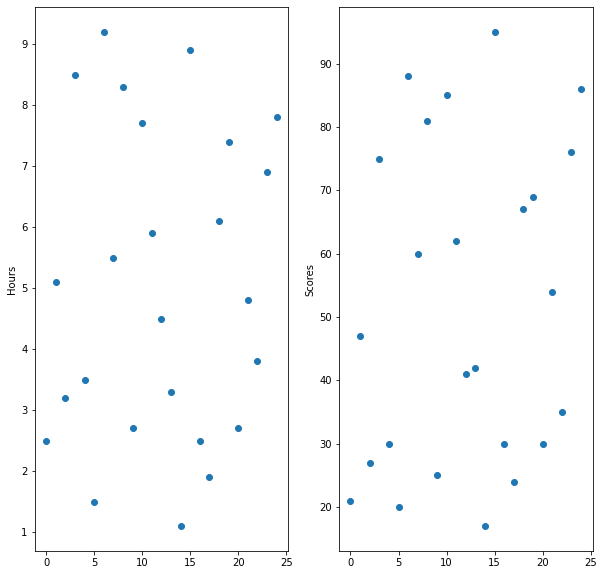

In [ ]:
'''Second step is visualization of data:
Purpose is to see the relation between the Feature and Target variable'''

numeric_columns = df.select_dtypes(include=np.number)
col_names = list(numeric_columns)

column_index = 0
rows = 1
columns = 2

fig, ax = plt.subplots(ncols=columns, nrows=rows, figsize=(10,10),squeeze=False)

for i in range(rows):
    for j in range(columns):
        ax[i][j].scatter(x = df.index, y = numeric_columns[col_names[column_index]])
        ax[i][j].set_ylabel(col_names[column_index])
        column_index += 1

we can see that there is relation between hours and scores to observe it clearly we will visualize using barplot.

Text(0.5, 1.0, 'Hours Vs Scores')

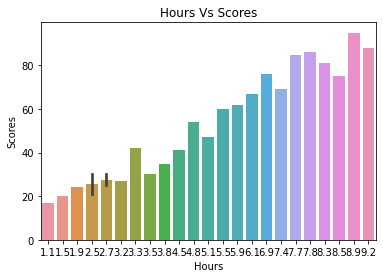

In [ ]:
'''Visualization Part 2'''

sns.barplot(x = df['Hours'], y = df['Scores'])
plt.title('Hours Vs Scores')

We can see that as hours increases scores increases.

Checking for outliers in Feature Variables



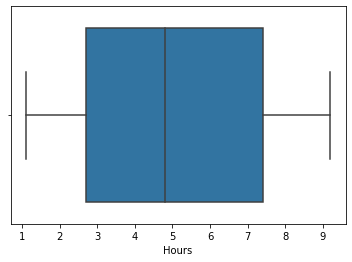

In [ ]:
'''Third step is to check for outliers'''

print('Checking for outliers in Feature Variables\n')

sns.boxplot(x=df['Hours'])

Checking for outliers in Target Variables



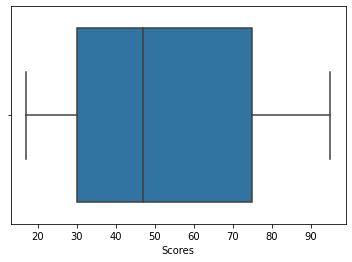

In [ ]:
print('Checking for outliers in Target Variables\n')

sns.boxplot(x=df['Scores'])

As we can see that there are no outliers present in the variable. If the outliers are present we can either dropped it of or capped it to smaller value.

# Step 4. Extracting Feature and Target Variables.

In [ ]:
Feature_Var = df[['Hours']]
Target_Var = df['Scores']

# Step 5. Splitting the variables into train and test datasets.

In [ ]:
Feature_Var_train,Feature_Var_test,Target_Var_train,Target_Var_test = train_test_split(Feature_Var,Target_Var,test_size=0.25,random_state=123)

# Observe the shape of each train and test data set.

In [ ]:
print(Feature_Var_train.shape)
print(Feature_Var_test.shape)
print(Target_Var_train.shape)
print(Target_Var_test.shape)

(18, 1)
(7, 1)
(18,)
(7,)


# Step 6. Training the model with Linear Regression.

In [ ]:
LR_model = LinearRegression()
LR_model.fit(Feature_Var_train,Target_Var_train)

LinearRegression()

In [ ]:
w0 = LR_model.intercept_

print(f'The intercept is found to be {w0}')

The intercept is found to be 2.448617866650636


In [ ]:
w1 = LR_model.coef_

print(f'The regression coeff is found to be {w1[0]}')

The regression coeff is found to be 9.617186092595931


In [ ]:
'''Predicting the Target variable and then comparing with Actual Target one'''

Target_Predicted = LR_model.predict(Feature_Var_test)

pd.DataFrame({'Actual': Target_Var_test, 'Predicted' : Target_Predicted})

,Actual,Predicted
5,20,16.874397
21,54,48.611111
22,35,38.993925
18,67,61.113453
15,95,88.041574
8,81,82.271262
7,60,55.343141


# Visualizing the TEST set.

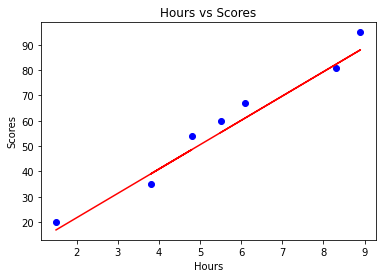

In [ ]:
plt.scatter(Feature_Var_test,Target_Var_test,color = 'blue')
plt.plot(Feature_Var_test,LR_model.predict(Feature_Var_test),color = 'red')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Visualizing the TRAIN set.

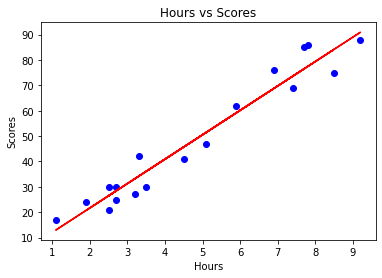

In [ ]:
plt.scatter(Feature_Var_train,Target_Var_train,color = 'blue')
plt.plot(Feature_Var_train,LR_model.predict(Feature_Var_train),color = 'red')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Plotting Linear Regression graph.

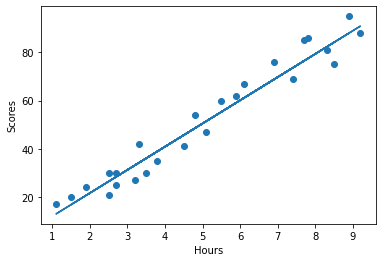

In [ ]:
line = w0 + w1*Feature_Var

plt.scatter(Feature_Var,Target_Var)
plt.plot(Feature_Var,line)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Step 7. Checking the Accuracy of the Model.

In [ ]:
print(f'The accuracy of Linear Regression model is found to be : {r2_score(Target_Var_test,Target_Predicted)}')

The accuracy of Linear Regression model is found to be : 0.9593798023076978


# Q. What will be the predicted score if student study for 9.5hours/day ?

In [ ]:
Hours = pd.Series({'Hours': 9.5}).values[0]

Score_Predicted = LR_model.predict(Hours.reshape(-1,1))

print(f'The predicted score will be {Score_Predicted[0]}')

The predicted score will be 93.81188574631199


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
